In [36]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns 
from tabulate import tabulate               
import matplotlib as mat

In [37]:
housing_data = pd.read_csv("DS1_C5_S3_BazilHousing_Data_Hackathon.csv")
housing_data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [38]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [39]:
housing_data.nunique()

city                      5
area                    517
rooms                    11
bathroom                 10
parking spaces           11
floor                    35
animal                    2
furniture                 2
hoa (R$)               1679
rent amount (R$)       1195
property tax (R$)      1243
fire insurance (R$)     216
total (R$)             5751
dtype: int64

In [40]:
def seprate_data_types(housing_data):
    categorical = []
    continuous = []
    for column in housing_data.columns:                
        if housing_data[column].nunique() < 215:       
                                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(housing_data)         


from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


# UNIVARIATE ANALYSIS OF CATEGORICAL DATA 

In [41]:
##checking for missing values

housing_data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [42]:
##defining a function for uniariate analysis of categorical datas.

def info_of_cat (col):
    print(f'Unique value in {col} are: {housing_data[col].unique()}')
    print("-"*60)
    print(f"Mode of {col} is {housing_data[col].mode()[0]}")
    print("-"*60)
    print(f"No of missing values in {col} is {housing_data[col].isnull().sum()}")

In [43]:
##City

info_of_cat('city')

Unique value in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
------------------------------------------------------------
Mode of city is São Paulo
------------------------------------------------------------
No of missing values in city is 0


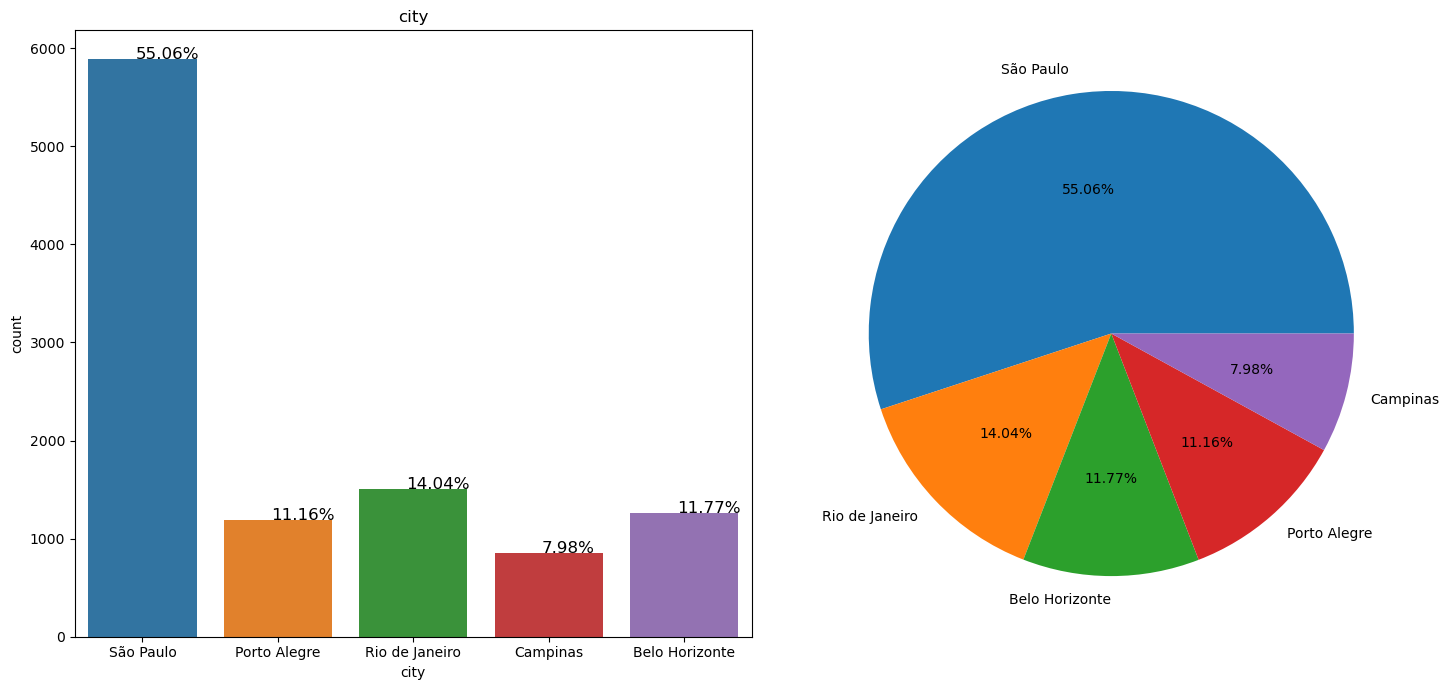

In [44]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (15, 7))
ax[0].set_title("city")                  
percentage = housing_data["city"].value_counts()         
labels = list(housing_data["city"].value_counts().index) 

ax = sns.countplot(x = housing_data["city"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels)
total = len(housing_data['city'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

INTERPRETATION : Sao Paulo and Rio de janerio is the most popular city choice by employees.

In [45]:
##rooms

info_of_cat('rooms')

Unique value in rooms are: [ 2  4  1  3  7  5  8  6 10 13  9]
------------------------------------------------------------
Mode of rooms is 3
------------------------------------------------------------
No of missing values in rooms is 0


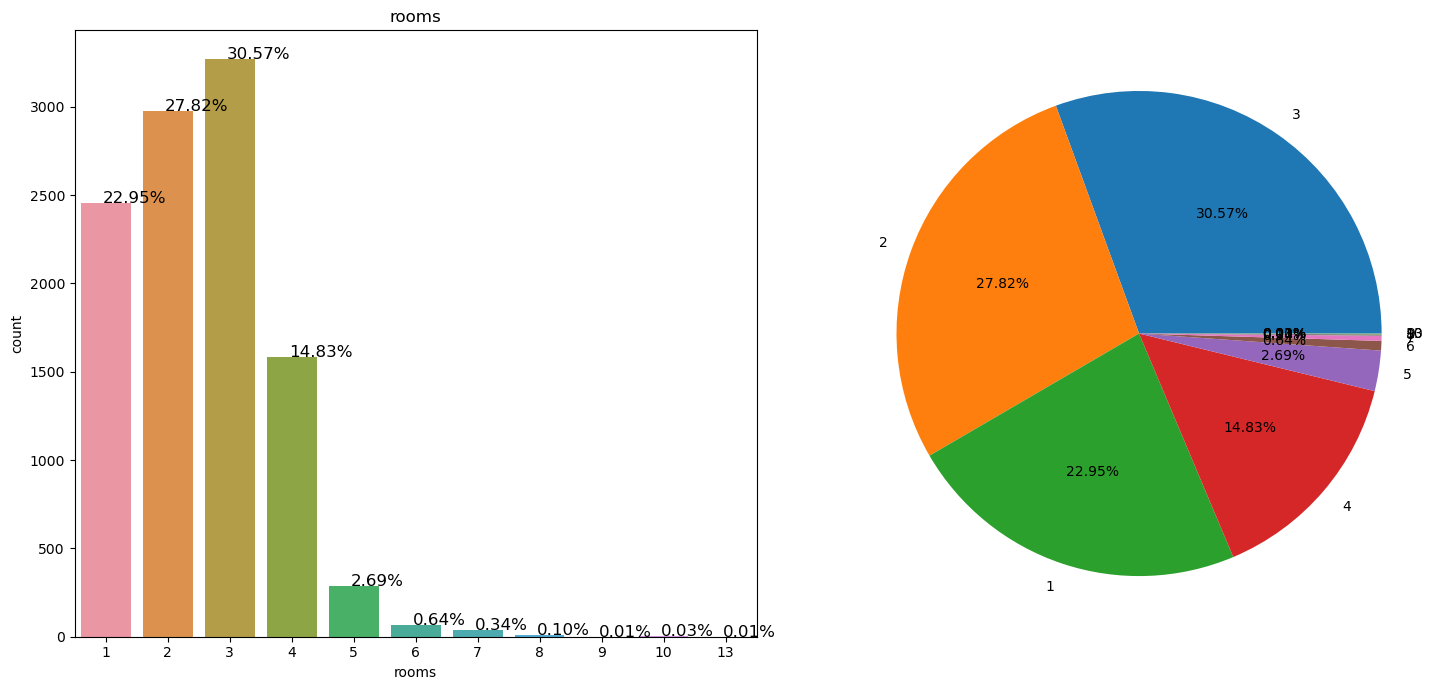

In [46]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (15, 7))
ax[0].set_title("rooms")                  
percentage = housing_data["rooms"].value_counts()         
labels = list(housing_data["rooms"].value_counts().index) 

ax = sns.countplot(x = housing_data["rooms"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels)
total = len(housing_data['rooms'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

INTERPRETATION : most of the houses have 1,2 or 3 rooms houses in general.

In [47]:
##bathroom

info_of_cat('bathroom')

Unique value in bathroom are: [ 1  4  3  2  6  5  7  9  8 10]
------------------------------------------------------------
Mode of bathroom is 1
------------------------------------------------------------
No of missing values in bathroom is 0


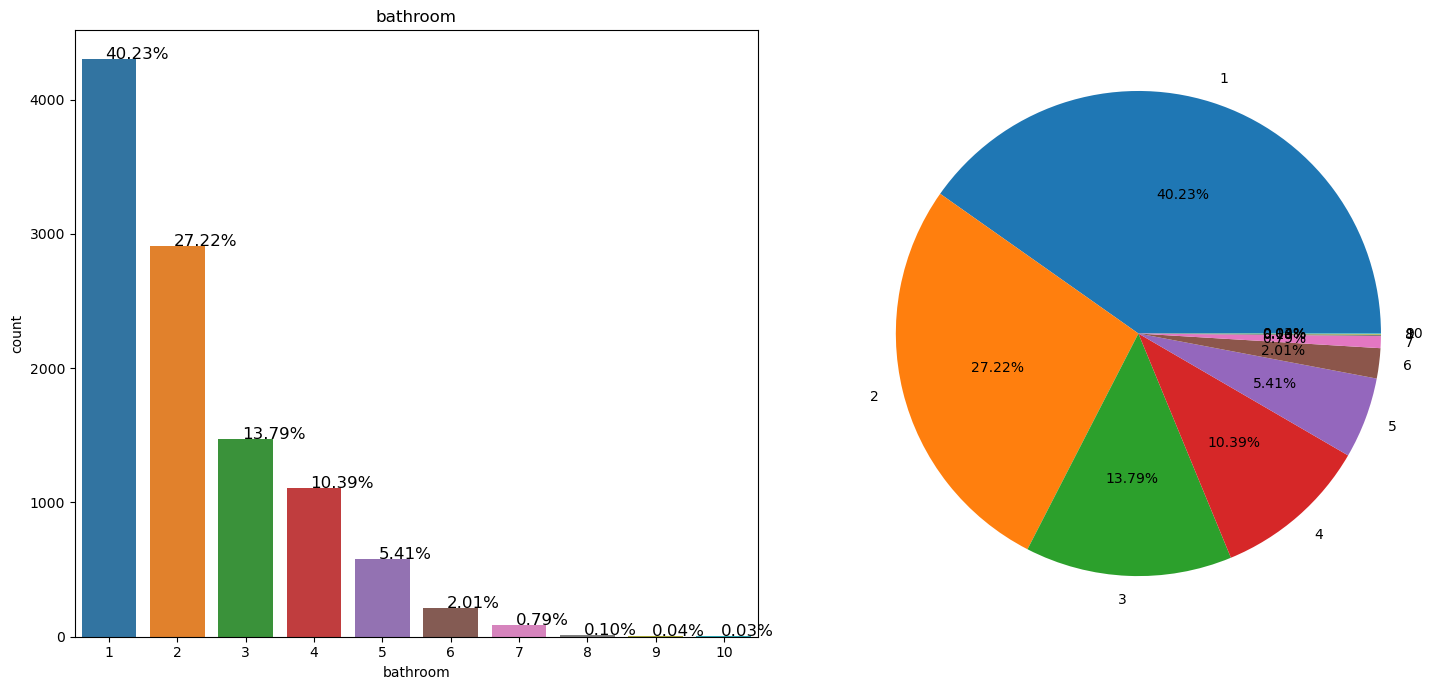

In [48]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (15, 7))
ax[0].set_title("bathroom")                  
percentage = housing_data["bathroom"].value_counts()         
labels = list(housing_data["bathroom"].value_counts().index) 

ax = sns.countplot(x = housing_data["bathroom"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels)
total = len(housing_data['bathroom'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

INTERPRETATION : most of the house has 1 bathroom

In [49]:
##parking_spaces

info_of_cat('parking spaces')

Unique value in parking spaces are: [ 1  0  7  4  2  6  3  8  5 10 12]
------------------------------------------------------------
Mode of parking spaces is 1
------------------------------------------------------------
No of missing values in parking spaces is 0


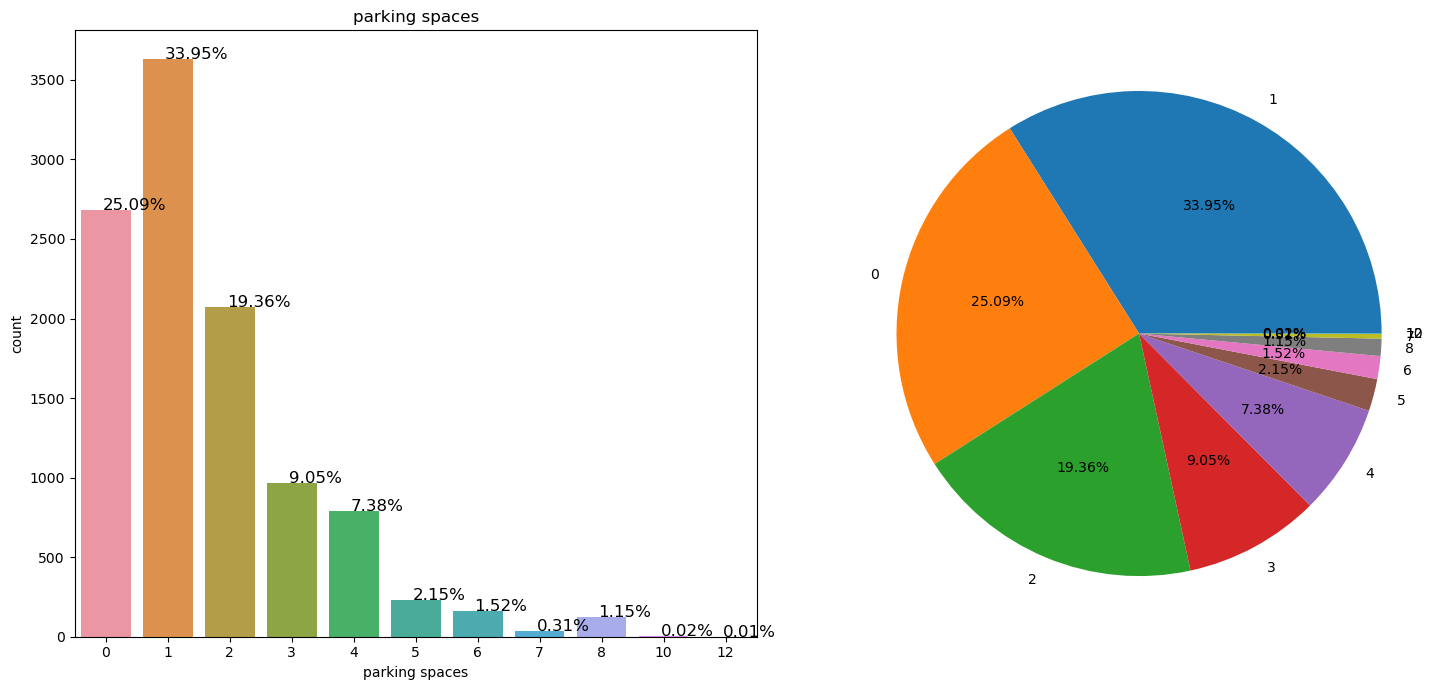

In [50]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (15, 7))
ax[0].set_title("parking spaces")                  
percentage = housing_data["parking spaces"].value_counts()         
labels = list(housing_data["parking spaces"].value_counts().index) 

ax = sns.countplot(x = housing_data["parking spaces"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels)
total = len(housing_data['parking spaces'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

INTERPRETATION : most of the house has 0 or 1 parking spaces.

In [51]:
##floor

info_of_cat('floor')

Unique value in floor are: [  7  20   6   2   1   0   4   3  10  11  24   9   8  17  18   5  13  15
  16  14  26  12  21  19  22  27  23  35  25  46  28  29 301  51  32]
------------------------------------------------------------
Mode of floor is 0
------------------------------------------------------------
No of missing values in floor is 0


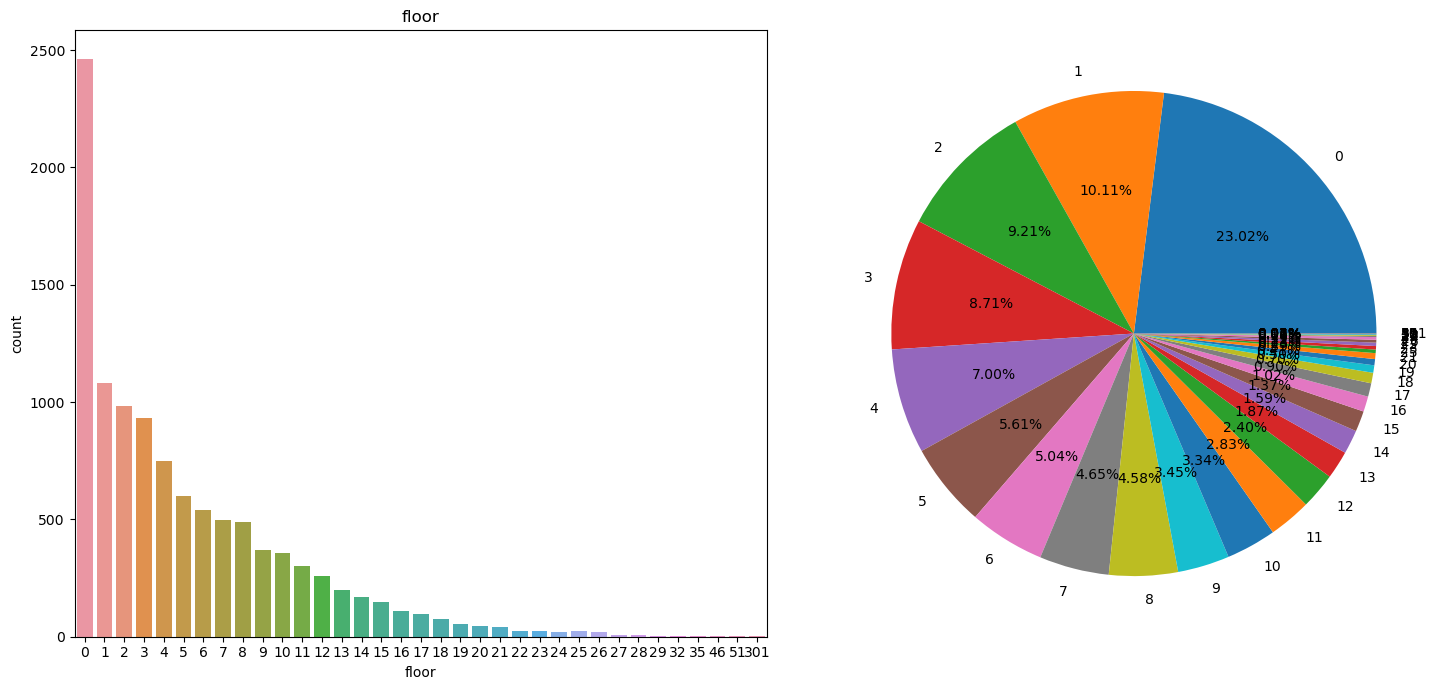

In [17]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (15, 7))
ax[0].set_title("floor")                  
percentage = housing_data["floor"].value_counts()         
labels = list(housing_data["floor"].value_counts().index) 

ax = sns.countplot(x = housing_data["floor"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels)

plt.tight_layout()

INTERPRETATION : most of the houses have 0 floors.

In [52]:
## animal

info_of_cat('animal')

Unique value in animal are: ['acept' 'not acept']
------------------------------------------------------------
Mode of animal is acept
------------------------------------------------------------
No of missing values in animal is 0


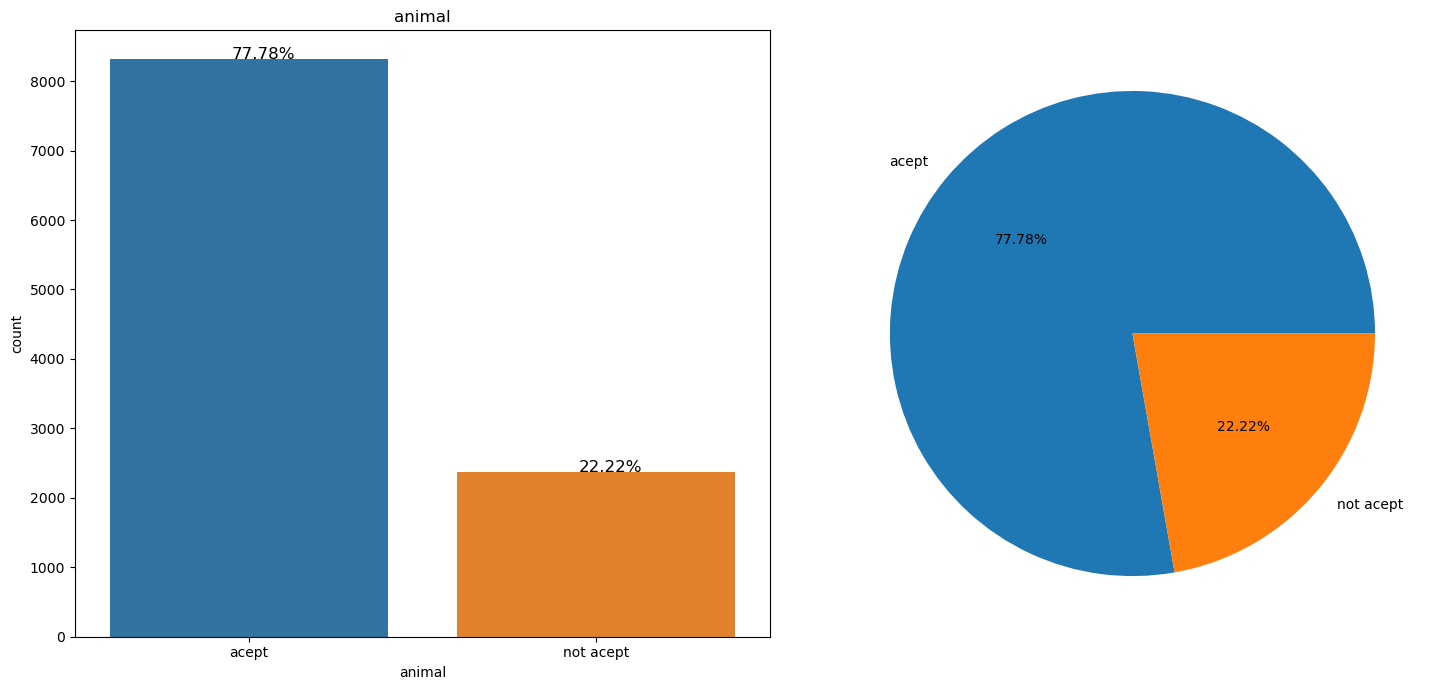

In [53]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (15, 7))
ax[0].set_title("animal")                  
percentage = housing_data["animal"].value_counts()         
labels = list(housing_data["animal"].value_counts().index) 

ax = sns.countplot(x = housing_data["animal"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels)
total = len(housing_data['animal'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

INTERPRETATION : MOST OF THE HOUSES ACCEPTS PET.

In [54]:
##furniture

info_of_cat('furniture')

Unique value in furniture are: ['furnished' 'not furnished']
------------------------------------------------------------
Mode of furniture is not furnished
------------------------------------------------------------
No of missing values in furniture is 0


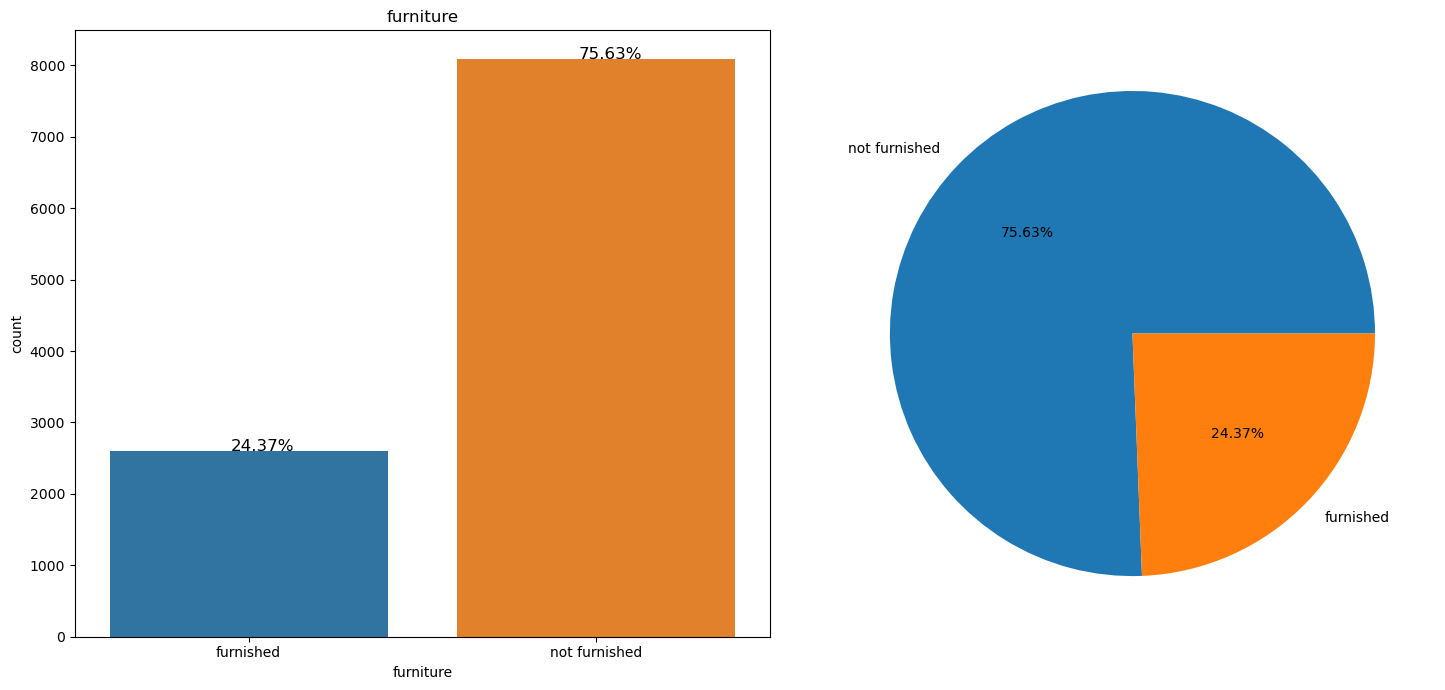

In [55]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (15, 7))
ax[0].set_title("furniture")                  
percentage = housing_data["furniture"].value_counts()         
labels = list(housing_data["furniture"].value_counts().index) 

ax = sns.countplot(x = housing_data["furniture"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels)
total = len(housing_data['furniture'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

INTERPRETATION : MOST OF THE HOUSES ARE NOT FURNISHED.

# UNIVARIATE ANALYSIS OF NUMERICAL DATA

In [56]:
##defining the function for the descriptive analysis of numercal dataset

def info_of_numerical(col):
    print(f"The mean of the {col} is {housing_data[col].mean()}")
    print("-"*60)
    print(f"The median of the {col} is {housing_data[col].median()}")
    print("-"*60)
    print(f"The mode of the {col} is {housing_data[col].mode()[0]}")
    print("-"*60)
    print(f"The standard deviation of the {col} is {housing_data[col].std()}")
    print("-"*60)
    print(f"Number of missing values in the {col} is {housing_data[col].isnull().sum()}")

In [57]:
##area

info_of_numerical('area')

The mean of the area is 149.21791994014217
------------------------------------------------------------
The median of the area is 90.0
------------------------------------------------------------
The mode of the area is 50
------------------------------------------------------------
The standard deviation of the area is 537.0169423364867
------------------------------------------------------------
Number of missing values in the area is 0


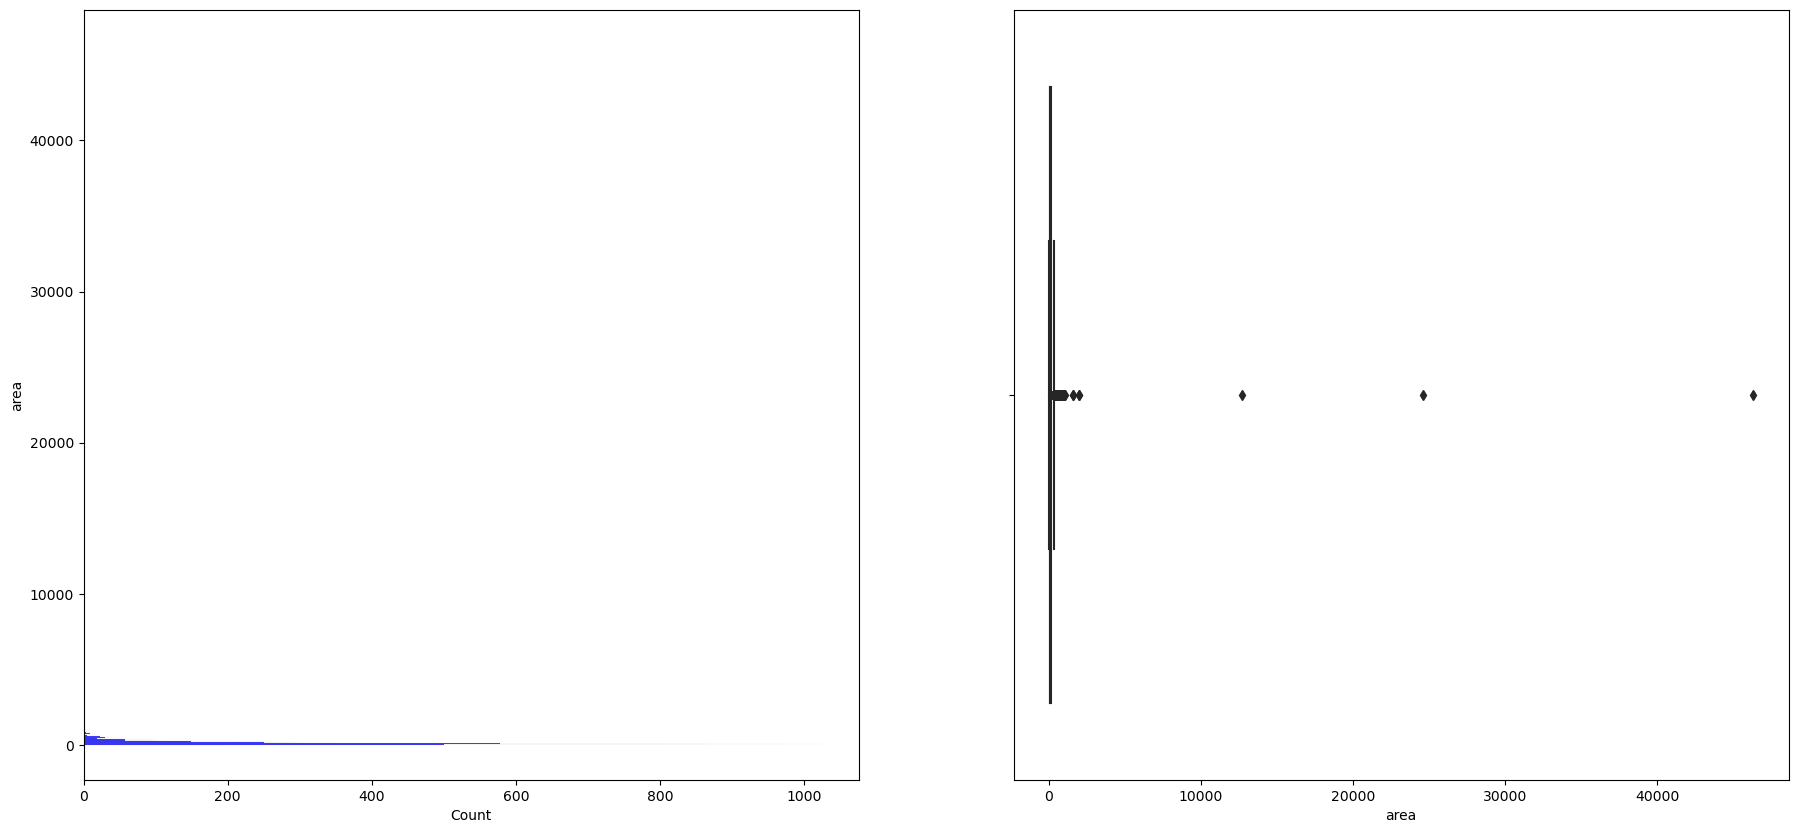

In [78]:
##plotting the required graph for better visualisation of data

fig, ax = plt.subplots (1, 2, figsize = (22, 10))
sns.histplot(y = housing_data['area'], ax = ax[0], color = 'blue')
sns.boxplot(x = housing_data['area'], ax = ax[1], color = 'green')
plt.show()

INTERPRETATION : most of the houses are 50 or more than 50 m sq.

In [61]:
##hoa (R$)

info_of_numerical('hoa (R$)')

The mean of the hoa (R$) is 1174.0216984661429
------------------------------------------------------------
The median of the hoa (R$) is 560.0
------------------------------------------------------------
The mode of the hoa (R$) is 0
------------------------------------------------------------
The standard deviation of the hoa (R$) is 15592.305248403356
------------------------------------------------------------
Number of missing values in the hoa (R$) is 0


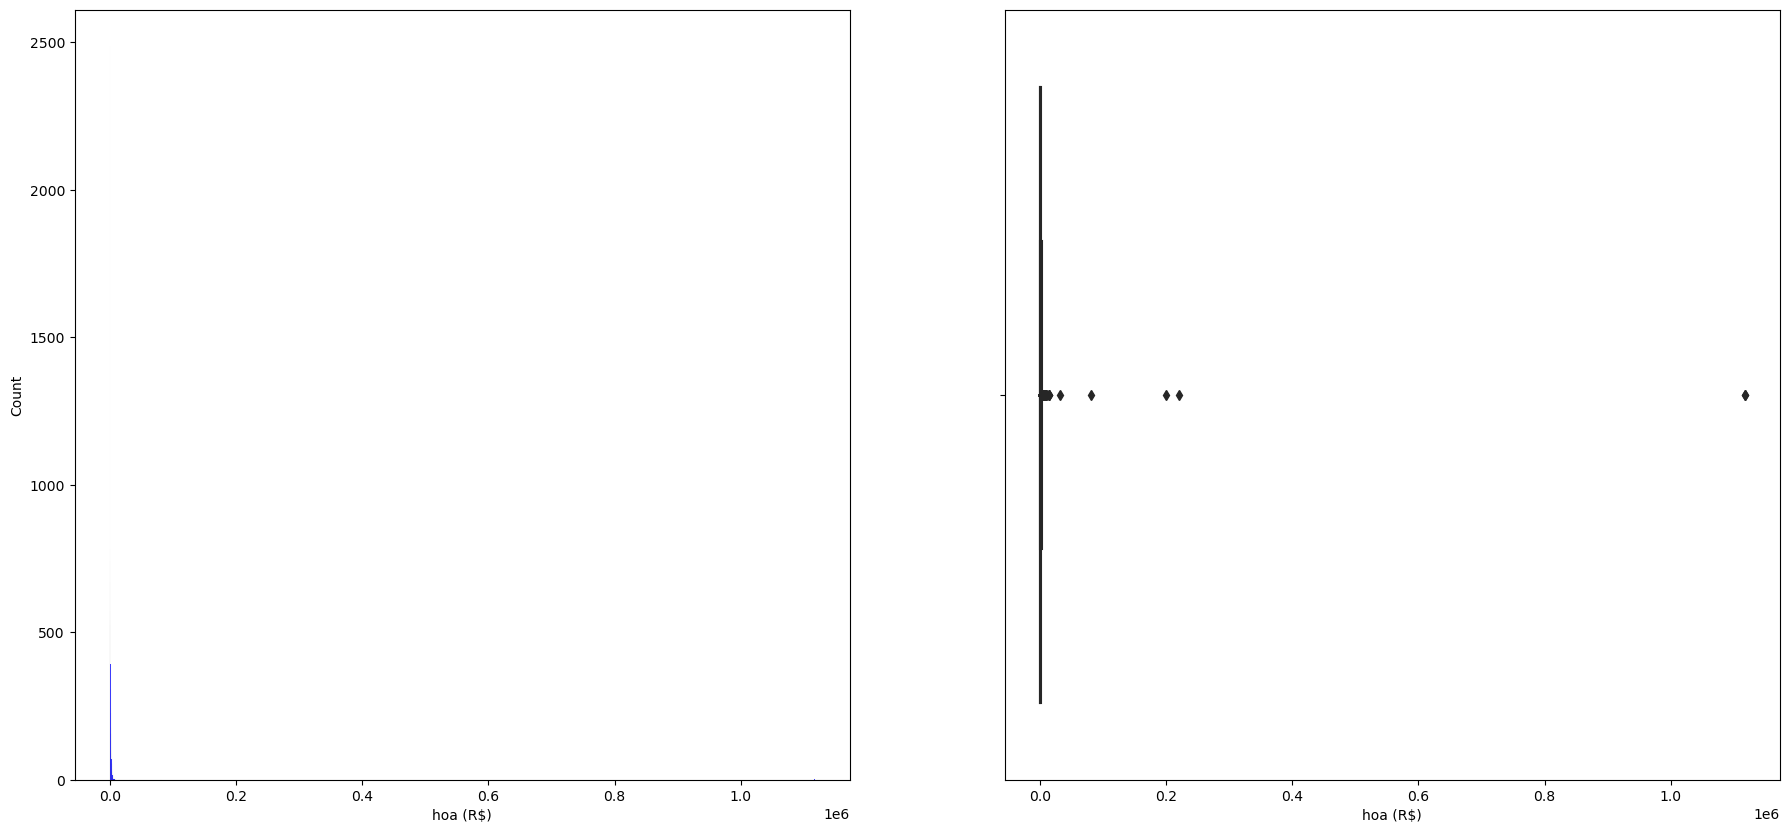

In [63]:
##plotting the required graph for better visualisation of data

fig, ax = plt.subplots (1, 2, figsize = (22, 10))
sns.histplot(x = housing_data['hoa (R$)'], ax = ax[0], color = 'blue')
sns.boxplot(x = housing_data['hoa (R$)'], ax = ax[1], color = 'green')
plt.show()

INTERPRETATION : MOST OF THE OWNER OF THE HOUSES DOESNT TAKE ANY HOME OWNER ASSOCIATION TAX.

In [64]:
##rent amount (R$)

info_of_numerical('rent amount (R$)')

The mean of the rent amount (R$) is 3896.247194163861
------------------------------------------------------------
The median of the rent amount (R$) is 2661.0
------------------------------------------------------------
The mode of the rent amount (R$) is 2500
------------------------------------------------------------
The standard deviation of the rent amount (R$) is 3408.5455176710816
------------------------------------------------------------
Number of missing values in the rent amount (R$) is 0


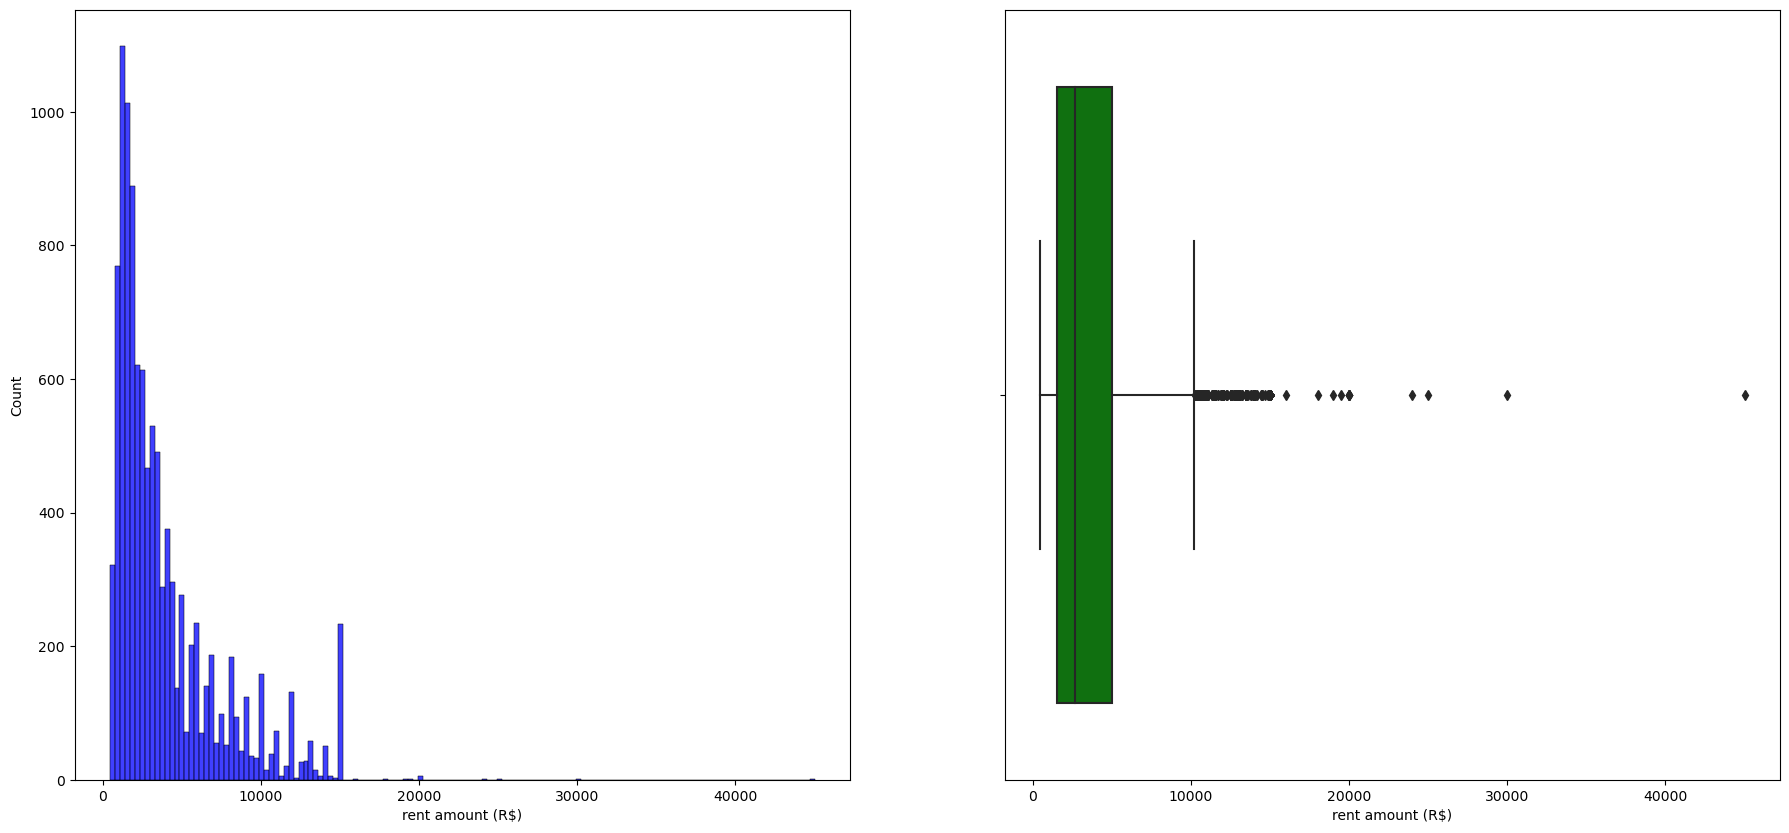

In [65]:
##plotting the required graph for better visualisation of data

fig, ax = plt.subplots (1, 2, figsize = (22, 10))
sns.histplot(x = housing_data['rent amount (R$)'], ax = ax[0], color = 'blue')
sns.boxplot(x = housing_data['rent amount (R$)'], ax = ax[1], color = 'green')
plt.show()

INTERPRETATION : MOST OF THE HOUSES HAS RENT 2500 OR MORE THAN THAT.

In [66]:
##property tax (R$)

info_of_numerical('property tax (R$)')

The mean of the property tax (R$) is 366.70435839880287
------------------------------------------------------------
The median of the property tax (R$) is 125.0
------------------------------------------------------------
The mode of the property tax (R$) is 0
------------------------------------------------------------
The standard deviation of the property tax (R$) is 3107.832321161917
------------------------------------------------------------
Number of missing values in the property tax (R$) is 0


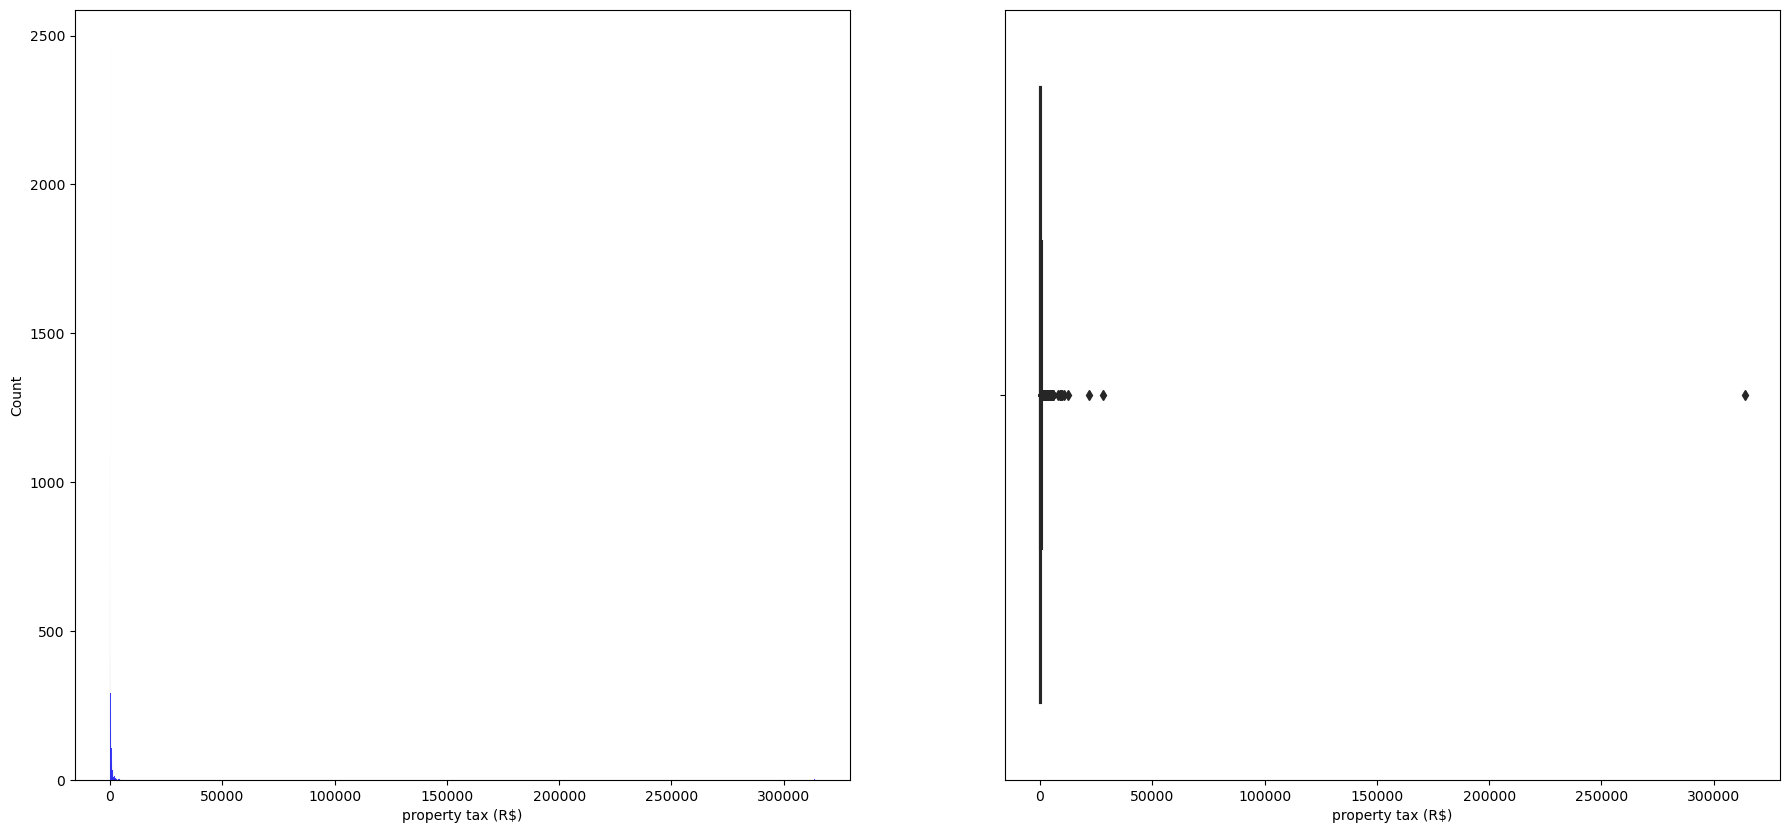

In [67]:
##plotting the required graph for better visualisation of data

fig, ax = plt.subplots (1, 2, figsize = (22, 10))
sns.histplot(x = housing_data['property tax (R$)'], ax = ax[0], color = 'blue')
sns.boxplot(x = housing_data['property tax (R$)'], ax = ax[1], color = 'green')
plt.show()

INTERPRETATION : MOST OF GTHE HOUSES DOES NOT TAKE ANY PROPERTY TAX

In [68]:
##fire insurance (R$)

info_of_numerical('fire insurance (R$)')

The mean of the fire insurance (R$) is 53.300879161990274
------------------------------------------------------------
The median of the fire insurance (R$) is 36.0
------------------------------------------------------------
The mode of the fire insurance (R$) is 16
------------------------------------------------------------
The standard deviation of the fire insurance (R$) is 47.768030930197206
------------------------------------------------------------
Number of missing values in the fire insurance (R$) is 0


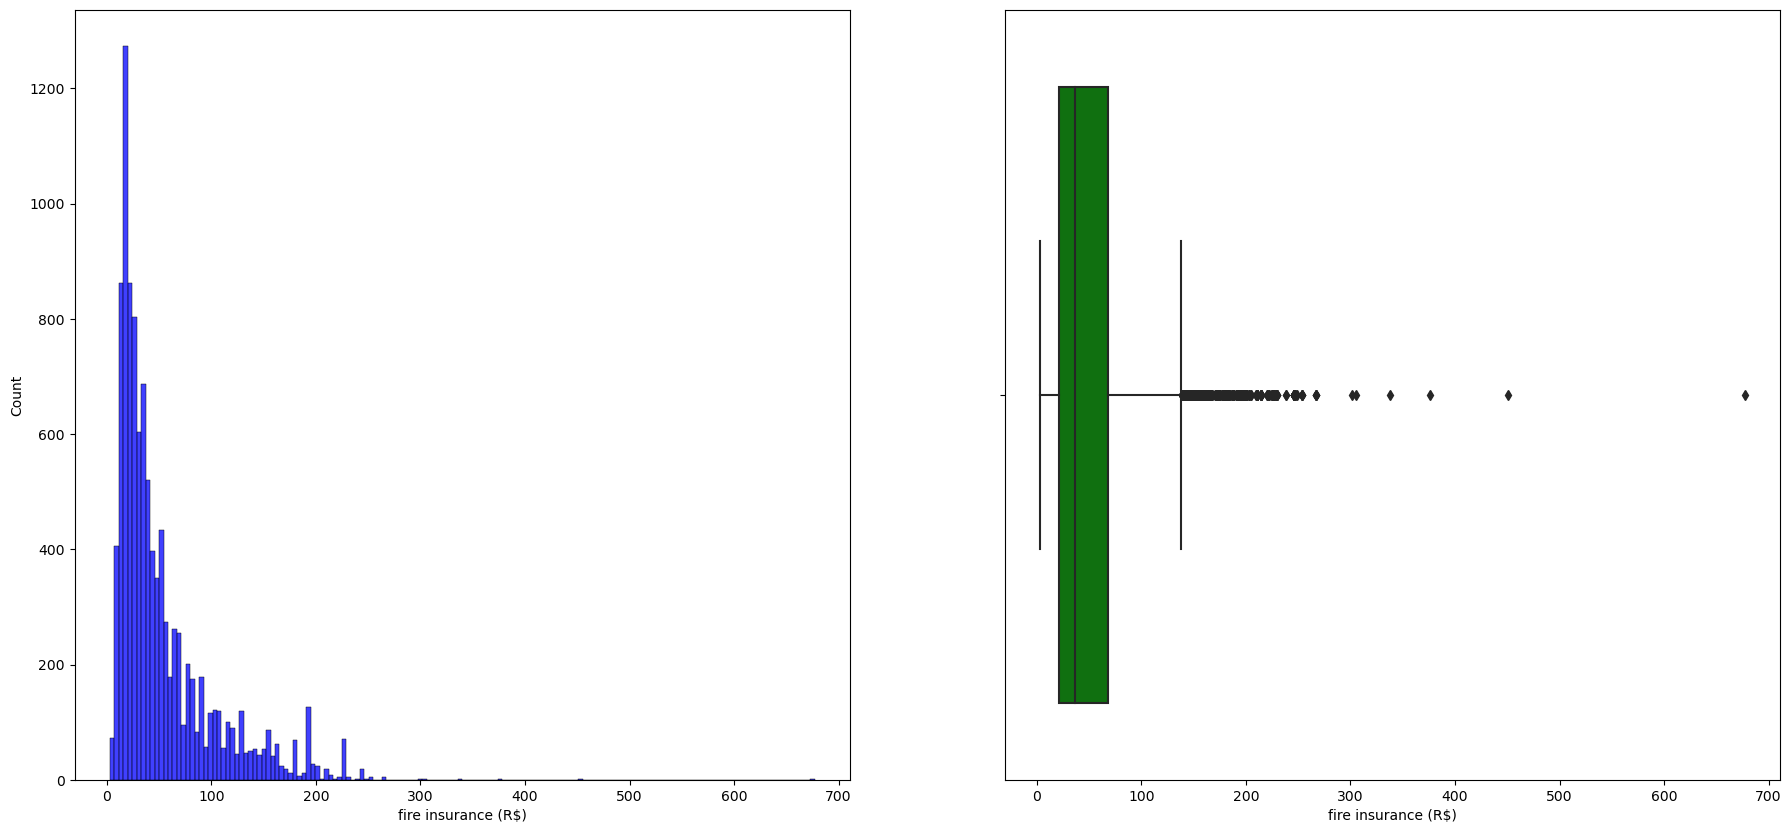

In [69]:
##plotting the required graph for better visualisation of data

fig, ax = plt.subplots (1, 2, figsize = (22, 10))
sns.histplot(x = housing_data['fire insurance (R$)'], ax = ax[0], color = 'blue')
sns.boxplot(x = housing_data['fire insurance (R$)'], ax = ax[1], color = 'green')
plt.show()

INTERPRETATION : MOST OF THE HOUSES HAS ITS FIRE INSAURANCE COST AS 16 $ OR MORE THAN THAT.

In [70]:
##total (R$)

info_of_numerical('total (R$)')

The mean of the total (R$) is 5490.4869996258885
------------------------------------------------------------
The median of the total (R$) is 3581.5
------------------------------------------------------------
The mode of the total (R$) is 2555
------------------------------------------------------------
The standard deviation of the total (R$) is 16484.72591235027
------------------------------------------------------------
Number of missing values in the total (R$) is 0


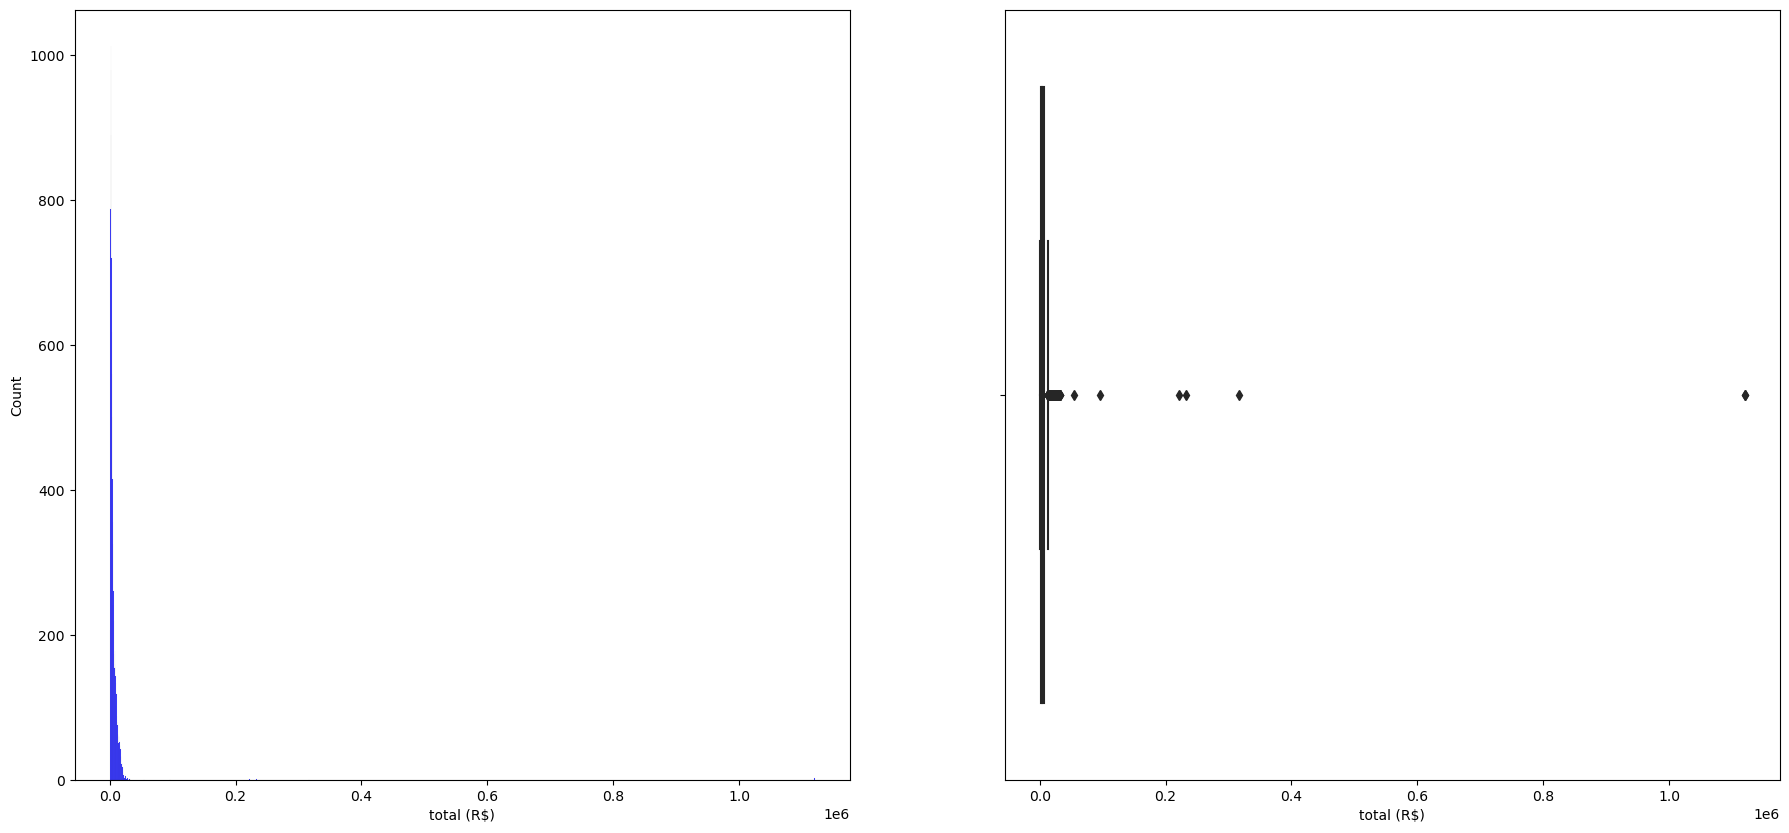

In [83]:
##plotting the required graph for better visualisation of data

fig, ax = plt.subplots (1, 2, figsize = (22, 10))
sns.histplot(x = housing_data['total (R$)'], ax = ax[0], color = 'blue')
sns.boxplot(x = housing_data['total (R$)'], ax = ax[1], color = 'green')
plt.show()

In [ ]:
INTERPRETATION : MOST OF THE HOUSES HAS ITS TOTAL RENT AS 2555 $ OR MORE THAN THAT.

# BIVARIATE ANALYSIS OFN CATEGORICAL DATA

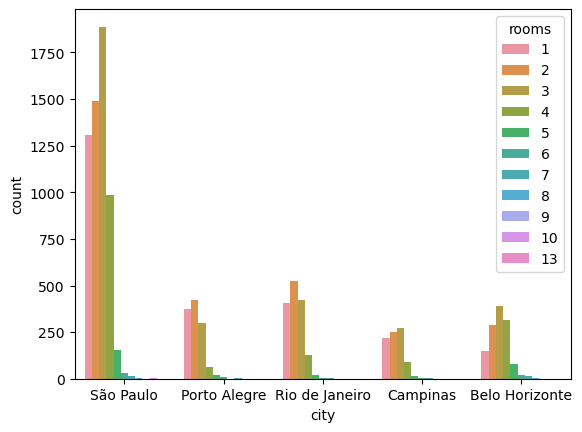

In [84]:
## RELATIONSHIP OF CITY WITH ROOMS

ax = sns.countplot(x=housing_data["city"],hue= housing_data["rooms"])

INTERPRETATION : widest range of rooms as per city : sao paulo > rio de janerio > porto alegre > belo horizonte > campinas

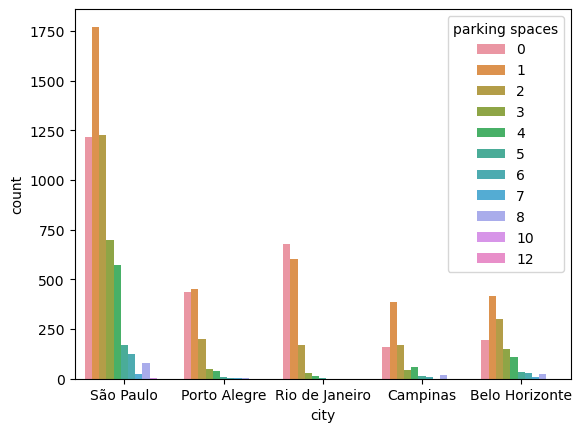

In [86]:
## RELATIONSHIP OF CITY WITH PARKING SPACES

ax = sns.countplot(x=housing_data["city"],hue= housing_data["parking spaces"])

INTERPRETATION : parking spaces area wise city is : sao paulo > rio de janerio > porto alegre > belo horizonte > campinas

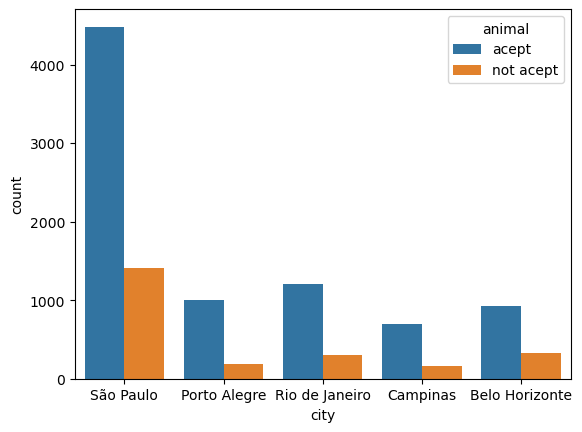

In [88]:
## RELATIONSHIP OF CITY WITH animal

ax = sns.countplot(x=housing_data["city"],hue= housing_data["animal"])

In [ ]:
INTERPRETATION : animal acceptance wise city is : sao paulo > rio de janerio > porto alegre > belo horizonte > campinas

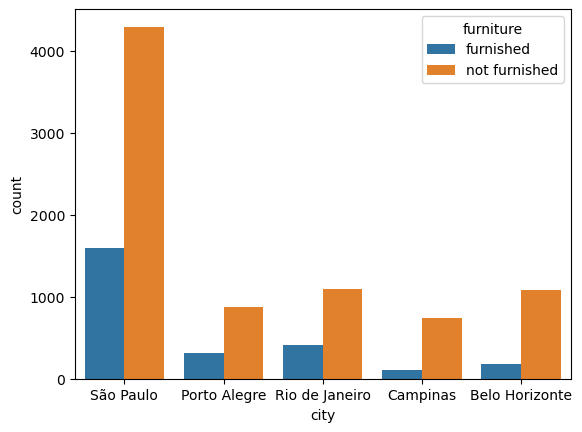

In [89]:
## RELATIONSHIP OF CITY WITH furniture

ax = sns.countplot(x=housing_data["city"],hue= housing_data["furniture"])

INTERPRETATION : furnished furniture wise city is : sao paulo > rio de janerio > porto alegre > belo horizonte >  campinas

# BIVARIATE ANALYSIS OF CATEGORICAL TO NUMERICAL DATA

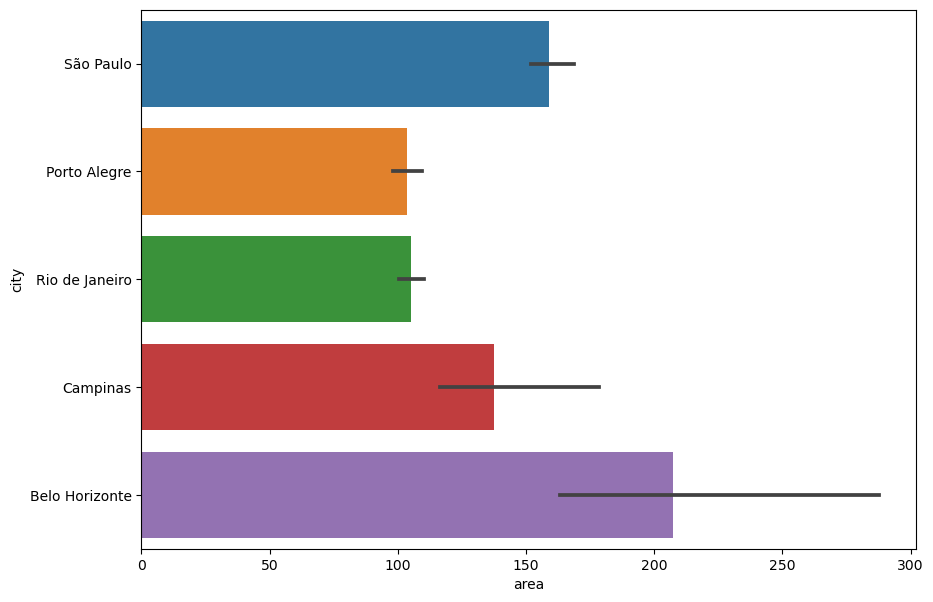

In [127]:
## RELATIONSHIP OF CITY WITH area


fig, ax = plt.subplots(figsize = (10, 7))
ax = sns.barplot(y = "city",x ="area", data = housing_data)

INTERPRETATION :area wise city is : belo horizonte > sau paulo > campinas > rio de janerio >porto alegre

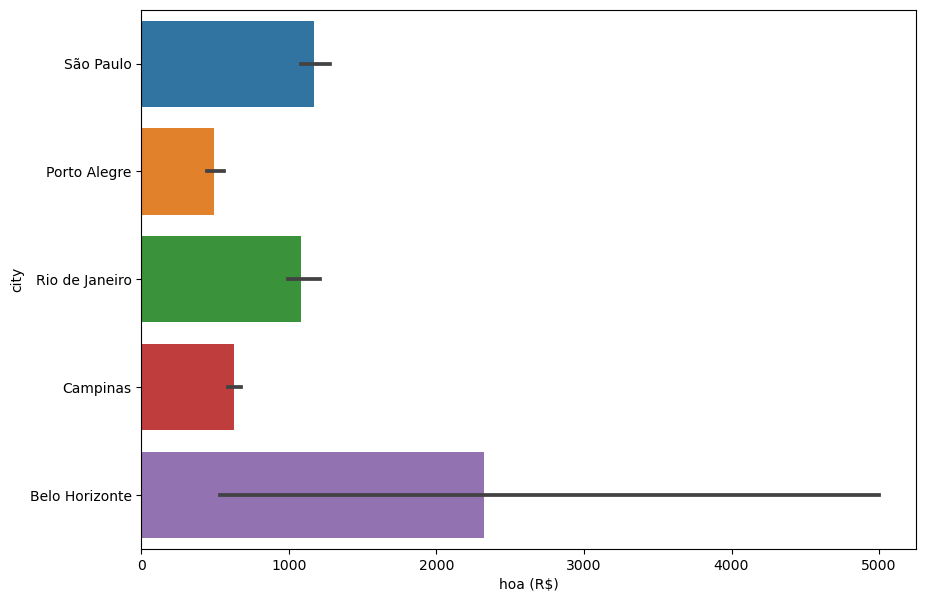

In [126]:
## RELATIONSHIP OF CITY WITH hoa


fig, ax = plt.subplots(figsize = (10, 7))
ax = sns.barplot(y = "city",x = "hoa (R$)", data = housing_data)

INTERPRETATION : parking spaces area wise city is : belo horizonte > sao paulo > rio de janerio > campinas > porto alegre

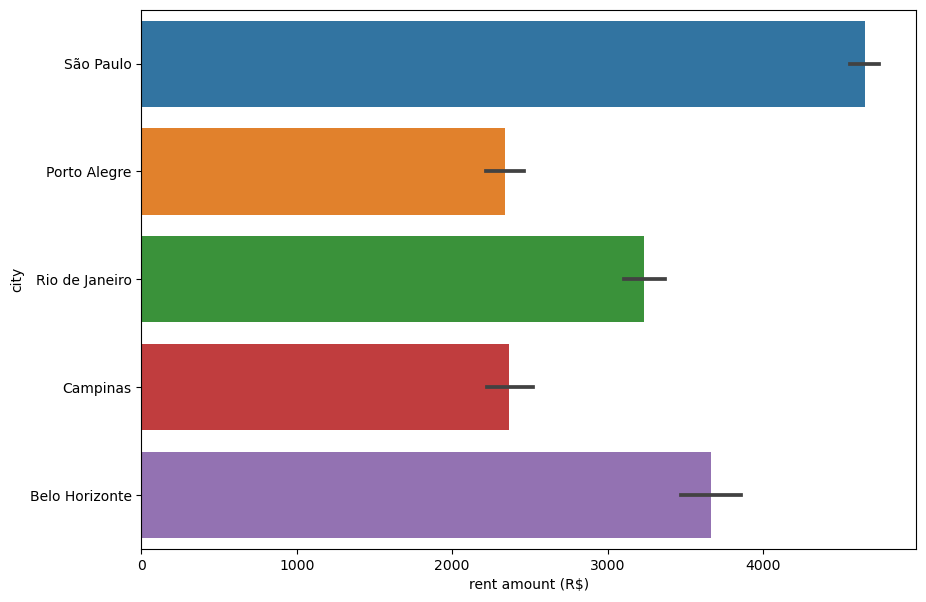

In [125]:
## RELATIONSHIP OF CITY WITH rent amount 


fig, ax = plt.subplots(figsize = (10, 7))
ax = sns.barplot(y = "city",x = "rent amount (R$)", data = housing_data)

INTERPRETATION: rent amount wise city is : sao paulo > belo horizonte > campinas > rio de janerio > porto alegre

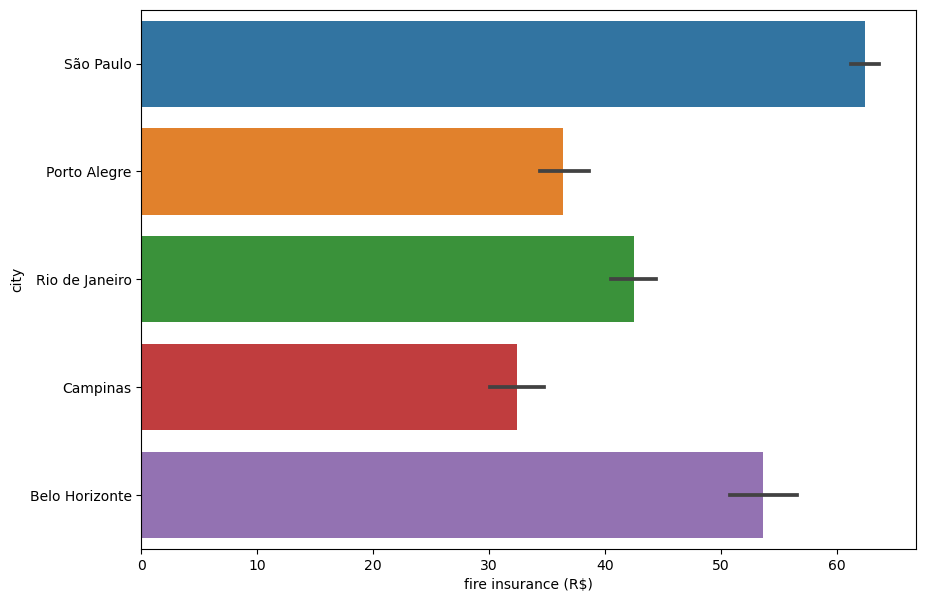

In [128]:
## RELATIONSHIP OF CITY WITH fire insaurance


fig, ax = plt.subplots(figsize = (10, 7))
ax = sns.barplot(y = "city",x = "fire insurance (R$)", data = housing_data)

INTERPRETATION : fire insurance wise city is : sao paulo > belo horizonte >  rio de janerio > porto alegre > campinas

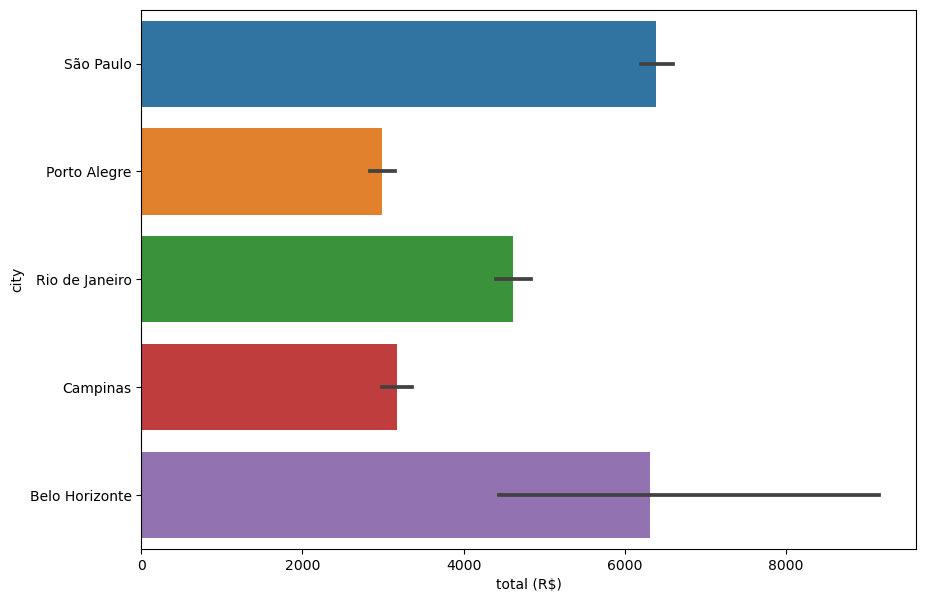

In [124]:
## RELATIONSHIP OF CITY WITH total 

fig, ax = plt.subplots(figsize = (10, 7))
ax = sns.barplot(y = "city",x = "total (R$)", data = housing_data)

INTERPRETATION : total cost  wise city is : sao paulo >  belo horizonte > rio de janerio > campinas > porte alegre

# MULTIVARTIATE ANALYSIS

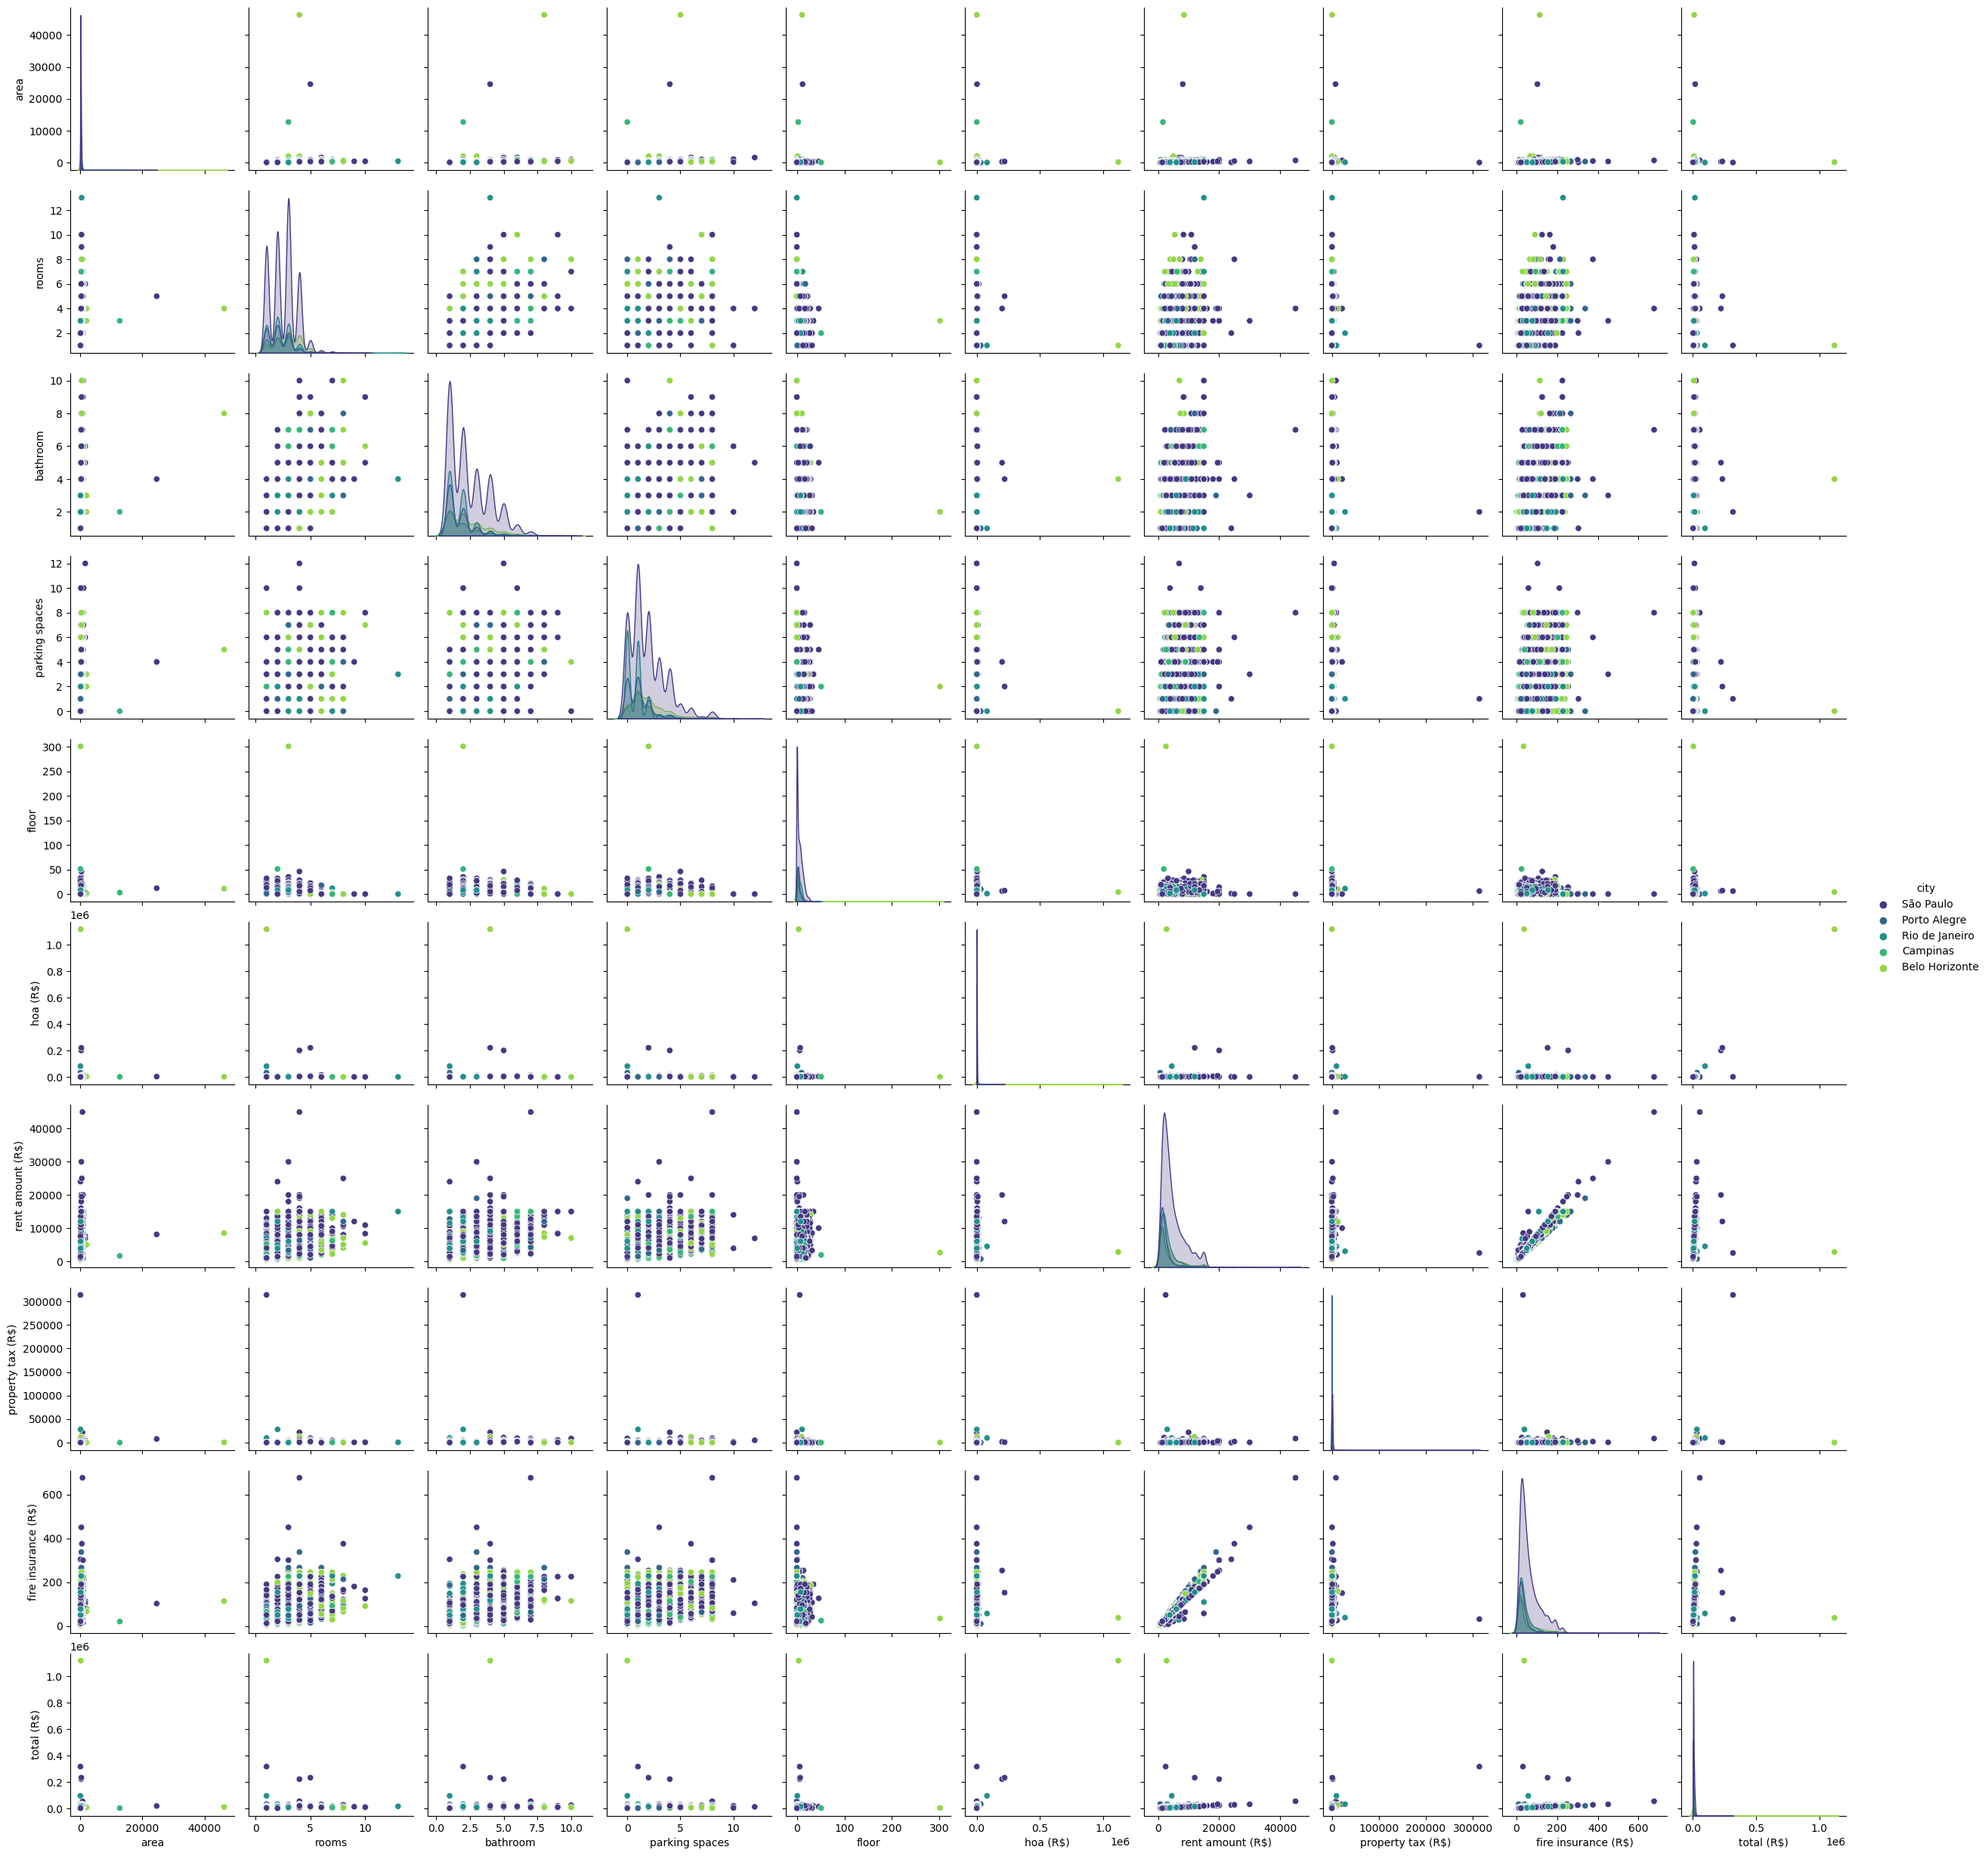

In [132]:
sns.pairplot(housing_data, hue = 'city', palette = 'viridis')

# CONCLUSION : -

for bachelors having pet and no car, suitable city will be campinas.

for bachelors having car and no pet, suitable city will be Porte Alegre.

for bachelors having car and  pet both, suitable city will be campinas.

for mid sized family, suitable city will be Porte Alegre(2/3rooms per house on an average).

for large families , suitable city to live would be campinas.